In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import joblib as jb
from sklearn.metrics import mean_squared_error


In [40]:
df = pd.read_csv("realtor-data.zip.csv")


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [42]:
df.isnull().sum()


brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

CLEAN DATA BY DROPING IRRELEVENT COLUMNS

In [43]:
df = df.drop(columns = ["brokered_by","zip_code","prev_sold_date"] )
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [44]:
df.shape

(2226382, 9)

In [45]:
df = df.dropna()
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [46]:
df.isna().sum()

status        0
price         0
bed           0
bath          0
acre_lot      0
street        0
city          0
state         0
house_size    0
dtype: int64

In [47]:
df.head()

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0


In [48]:
df.duplicated().sum()

535

In [49]:
df.drop_duplicates(inplace = True)
df

C:\Users\AD\AppData\Local\Temp\ipykernel_17768\870522923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [50]:
df["status"].value_counts()

status
for_sale    747459
sold        608403
Name: count, dtype: int64

Visualize the data

GROUP COLUMNS

In [51]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [52]:
Price_by_State = df.groupby("state")["price"].mean().sort_values(ascending=False)
Price_by_State = pd.DataFrame(Price_by_State)
Price_by_State.astype("int64")

,price
state,
Virgin Islands,1947522
Hawaii,1491548
District of Columbia,1209649
California,1107572
Colorado,952486
Utah,914531
Montana,862815
Connecticut,790488
Massachusetts,754230


In [53]:
Price_by_City = df.groupby("city")["price"].mean().sort_values(ascending=False).astype("int64")
Price_by_City

city
International      2147483600
Bolingbroke          45250000
Bal Harbour          26585714
Gulf Stream          21461250
Woody Creek          20987500
                      ...    
Otter Rock              10033
Midwest                 10000
Center Junction          8500
Rowan                    7500
Pilot Mound              6500
Name: price, Length: 17114, dtype: int64

In [54]:
Price_by_City_State = df.groupby(["state", "city"])["price"].mean().astype("int64")
Price_by_City_State

state    city      
Alabama  Abbeville      220154
         Adamsville     138441
         Addison        145950
         Adger          174372
         Akron          438940
                        ...   
Wyoming  Wheatland      281578
         Wilson        5719900
         Worland        288907
         Wright         291160
         Yoder          340666
Name: price, Length: 26260, dtype: int64

SELECT THE NUMBER_DATA

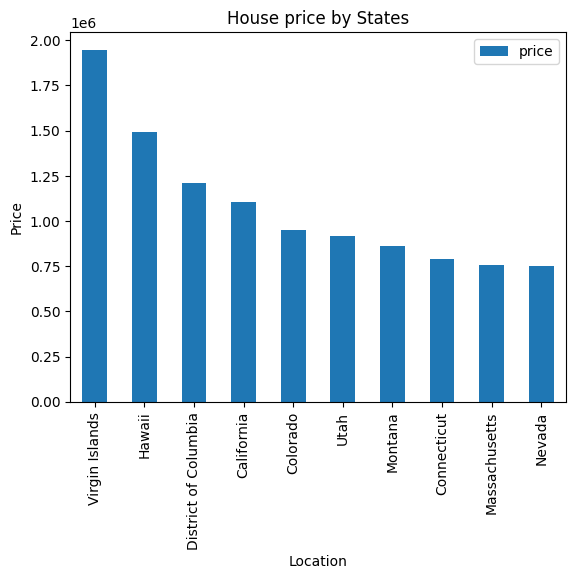

In [55]:
Price_by_State.head(10).plot(kind = "bar")
plt.title("House price by States")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

In [56]:
df_num = df.select_dtypes(include = ["number"])
df_num

,price,bed,bath,acre_lot,street,house_size
0,105000.0,3.0,2.0,0.12,1962661.0,920.0
1,80000.0,4.0,2.0,0.08,1902874.0,1527.0
2,67000.0,2.0,1.0,0.15,1404990.0,748.0
3,145000.0,4.0,2.0,0.10,1947675.0,1800.0
5,179000.0,4.0,3.0,0.46,1850806.0,2520.0
...,...,...,...,...,...,...
2226377,359900.0,4.0,2.0,0.33,353094.0,3600.0
2226378,350000.0,3.0,2.0,0.10,1062149.0,1616.0
2226379,440000.0,6.0,3.0,0.50,405677.0,3200.0
2226380,179900.0,2.0,1.0,0.09,761379.0,933.0


In [57]:
# find the correlations in term of price (If price went up, which categories would affect it)
df_num.corr()["price"].sort_values(ascending=False)

price         1.000000
bath          0.208868
bed           0.117585
house_size    0.073849
acre_lot      0.005304
street        0.000481
Name: price, dtype: float64

from the correlations , we can see that when the price went up, It could be likely the bathroom_num and the bedroom_num affect it

In [58]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


BUILD THE MODEL USING LinearRegeression

In [59]:
# train the data
X =df[["bed", "bath", "house_size"]]
y = df["price"]

In [60]:
# SCALE THE DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 30% of the data is on the test set and 70% is on the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [62]:
# save the scaler for the app using jooblib
jb.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [63]:
X_test = scaler.fit_transform(X_test)

In [64]:
# BUILD MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [65]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 369852.78419488,  376902.11114589,  377582.54811028, ...,
        516940.19498159,   41360.65926717, 1139276.59461061])

In [66]:
mean_squared_error(y_test, y_pred, squared=False)

c:\Users\AD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3517436.671996617

In [67]:
jb.dump(lr ,"model.pkl")

['model.pkl']

In [68]:
#CHECK ACCURACY
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print("The accuracy of the model is {}%".format(round(score, 2) *100))

The accuracy of the model is 2.0%
